In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlib
import seaborn as sns
%matplotlib inline
import re


In [26]:
train = pd.read_excel('WATER1.XLS')
train.head()

,region,district_code,population,water_quality,quality_group,quantity,quantity_group,source,region_code
0,Iringa,5,109,soft,good,enough,enough,spring,11
1,Mara,2,280,soft,good,insufficient,insufficient,rainwater harvesting,20
2,Manyara,4,250,soft,good,enough,enough,dam,21
3,Mtwara,63,58,soft,good,dry,dry,machine dbh,90
4,Kagera,1,0,soft,good,seasonal,seasonal,rainwater harvesting,18


In [27]:
train.drop(['district_code' , 'quality_group' , 'quantity_group','source'  ], axis=1 , inplace=True)
train.head()

,region,population,water_quality,quantity,region_code
0,Iringa,109,soft,enough,11
1,Mara,280,soft,insufficient,20
2,Manyara,250,soft,enough,21
3,Mtwara,58,soft,dry,90
4,Kagera,0,soft,seasonal,18


In [28]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = LabelEncoder()
train.iloc[:,0] = encoder.fit_transform(train.iloc[:,0])
train.iloc[:,3] = encoder.fit_transform(train.iloc[:,3])
train.iloc[:,2] = encoder.fit_transform(train.iloc[:,2])

train.head()

,region,population,water_quality,quantity,region_code
0,3,109,6,1,11
1,9,280,6,2,20
2,8,250,6,1,21
3,12,58,6,0,90
4,4,0,6,3,18


In [29]:
models=['logReg','xgboost' , 'random forest' , 'lgbm' ]
results=[]

In [30]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(train.drop('quantity' , axis=1), train['quantity'] , test_size=0.3 , random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
y_pred=logmodel.predict(x_test)
y_pred
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
results.append(accuracy)

0.562065095398


In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed=8
test_size=0.33
x_train , x_test , y_train , y_test = train_test_split(train.drop('quantity' , axis=1), train['quantity'] , test_size=test_size , random_state=seed)
model=XGBClassifier(max_depth=10 , min_child_weight=7 ,seed=seed , subsample=0.7)
model.fit(x_train,y_train)
print(model)
y_pred=model.predict(x_test)
predictions=[round(value) for value in y_pred]
accuracy=accuracy_score(y_test,predictions)
print("accuracy: %.2f%%" %(accuracy * 100.0))
results.append(accuracy)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=10, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=8, silent=None,
       subsample=0.7, verbosity=1)
accuracy: 62.97%


In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( max_depth=10,random_state=11,min_samples_leaf=2)
clf.fit(x_train, y_train)
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=11, verbose=0, warm_start=False)


In [34]:
y_pred=clf.predict(x_test)

In [35]:
print(classification_report(y_test,y_pred))
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
results.append(accuracy)

             precision    recall  f1-score   support

          0       0.67      0.26      0.37      2058
          1       0.62      0.94      0.75     11048
          2       0.63      0.25      0.36      4937
          3       0.81      0.05      0.09      1318
          4       0.59      0.44      0.50       241

avg / total       0.64      0.63      0.56     19602

0.62661973268


In [36]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='multiclass', random_state=8 , max_depth=-1)

lgbm.fit(x_train, y_train)
print(lgbm)

y_pred = lgbm.predict(x_test)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective='multiclass',
        random_state=8, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [37]:
print(classification_report(y_test,y_pred))
accuracy=accuracy_score(y_test,y_pred)
results.append(accuracy)

             precision    recall  f1-score   support

          0       0.65      0.28      0.40      2058
          1       0.63      0.93      0.75     11048
          2       0.61      0.27      0.37      4937
          3       0.70      0.06      0.10      1318
          4       0.60      0.44      0.51       241

avg / total       0.63      0.63      0.57     19602



In [38]:
results

[0.56206509539842875,
 0.62968064483216002,
 0.62661973268033877,
 0.63075196408529743]

<Container object of 4 artists>

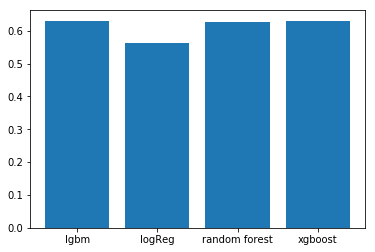

In [39]:
mlib.bar(models,results)